What the computer sees (The Matrix):
[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]

What we see:


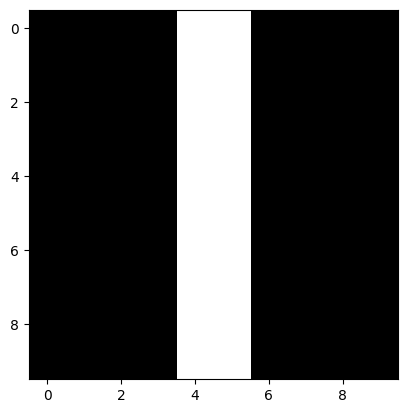

In [ ]:
# Phase 1 : 1) The Setup
import numpy as np
import matplotlib.pyplot as plt

# 1. CREATE DATA
# Create a 10x10 grid of zeros (black image)
# Computer sees: A matrix of numbers
image_data = np.zeros((10, 10))

# 2. MODIFY DATA
# Let's draw a simple vertical line by changing numbers to 1 (white)
# In ML, 0 usually means black, 1 (or 255) means white.
image_data[:, 4:6] = 1

# 3. VISUALIZE
# Humans need pictures; computers need the numbers.
print("What the computer sees (The Matrix):")
print(image_data)

print("\nWhat we see:")
plt.imshow(image_data, cmap='gray')
plt.show()

In [ ]:
# Phase 1 : 2) Loading dataset
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# 1. DOWNLOAD DATA
# We use a utility to download the "German Traffic Sign" dataset
# This might take 30-60 seconds to download.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
data_dir = dataset_path # Corrected: data_dir should point to the extracted directory

print(f"Data downloaded to: {data_dir}")

# 2. LOAD DATA
# The data comes in "Pickle" files (.p), a python format for saving arrays.
import pickle

# We have training data (to learn) and test data (to check performance)
training_file = os.path.join(data_dir, 'train.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)

# 3. SEPARATE IMAGES AND LABELS
# X = The Image (The Question)
# y = The Label/Answer ID (The Answer)
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print("\n--- DATA LOADED ---")
print(f"Training images: {len(X_train)}")
print(f"Testing images: {len(X_test)}")
print(f"Image shape: {X_train[0].shape}")

Data downloaded to: /root/.keras/datasets/traffic-signs-data_extracted

--- DATA LOADED ---
Training images: 34799
Testing images: 12630
Image shape: (32, 32, 3)


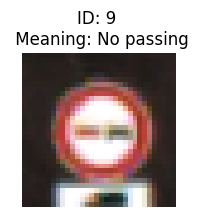

In [ ]:
# Phase 1 : 3) Visualization
import random

# Dictionary to map the ID number to the Sign Name
label_map = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield',
    14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work',
    26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead',
    34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right',
    37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

# Pick a random number between 0 and 34799
index = random.randint(0, len(X_train))

image = X_train[index]
label_id = y_train[index]

plt.figure(figsize=(2,2))
plt.imshow(image)
plt.title(f"ID: {label_id} \n Meaning: {label_map[label_id]}")
plt.axis('off') # Hide the ruler/axis numbers
plt.show()

In [ ]:
# Phase 1 : 4) Pre-processing code (Shuffle + Normalize)
from sklearn.utils import shuffle

# 1. SHUFFLE THE DATA
# Good practice to ensure randomness
X_train, y_train = shuffle(X_train, y_train)

# 2. NORMALIZE THE DATA
# We convert integers (whole numbers) to floats (decimals) first
# Then we divide by 255.0
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

print("--- DATA NORMALIZED ---")
print(f"Original value sample (first pixel): {X_train[0][0][0]}") # Likely a big number like 120, 45, 200
print(f"Normalized value sample (first pixel): {X_train_norm[0][0][0]}") # Will be between 0.0 and 1.0

--- DATA NORMALIZED ---
Original value sample (first pixel): [90 80 68]
Normalized value sample (first pixel): [0.3529412  0.3137255  0.26666668]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# 1. DEFINE THE MODEL
model = Sequential()

# 2. ADD LAYERS
# Layer 1: Flatten
# Turns the 32x32x3 grid into a long line of 3,072 numbers
model.add(Input(shape=(32, 32, 3)))
model.add(Flatten())

# Layer 2: The "Hidden" Layer
# 300 Neurons that will try to find relationships between pixels
# 'relu' is the switch that turns neurons on or off
model.add(Dense(300, activation='relu'))

# Layer 3: Another Hidden Layer (Deep Learning means multiple layers!)
# Let's add 150 neurons here to refine the patterns found by the first layer
model.add(Dense(150, activation='relu'))

# Layer 4: The Output Layer
# 43 Neurons (one for each traffic sign type)
# 'softmax' ensures all 43 output numbers add up to 1.0 (100% probability)
model.add(Dense(43, activation='softmax'))

# 3. COMPILE THE MODEL
# This tells the model HOW to learn.
# 'adam' = The optimizer (the teacher that corrects the model)
# 'sparse_categorical_crossentropy' = The way we calculate error (for classification)
# 'accuracy' = The metric we want to see improve
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. VIEW THE ARCHITECTURE
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         6,493 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 973,543 (3.71 MB)

 Trainable params: 973,543 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAIN THE MODEL
# This might take 1-2 minutes depending on your Colab connection
history = model.fit(X_train_norm, y_train,
                    epochs=10,
                    validation_data=(X_test_norm, y_test))

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.3713 - loss: 2.4584 - val_accuracy: 0.6930 - val_loss: 1.1951
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.7803 - loss: 0.7806 - val_accuracy: 0.7178 - val_loss: 1.1487
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8493 - loss: 0.5463 - val_accuracy: 0.7717 - val_loss: 1.1217
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.8851 - loss: 0.4155 - val_accuracy: 0.8116 - val_loss: 0.9123
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.8964 - loss: 0.3690 - val_accuracy: 0.7799 - val_loss: 1.1494
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9103 - loss: 0.3259 - val_accuracy: 0.7927 - val_loss: 1.1455
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.9177 - loss: 0.2914 - val_accuracy: 0.8070 - val_loss: 1.0283
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9260 -

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Input
from tensorflow.keras.models import Sequential

# 1. DEFINE THE CNN MODEL
model = Sequential()

# Explicit Input Layer
model.add(Input(shape=(32, 32, 3)))

# Layer 1: Convolution
# Filters=32: Look for 32 different features (lines, curves, colors)
# kernel_size=(5,5): The magnifying glass is 5x5 pixels big
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# Layer 2: Convolution again
# Filters=64: Look for 64 more complex features (shapes, simple objects)
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Layer 3: Max Pooling
# Shrink the image! Take the biggest number in every 2x2 grid.
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 4: Dropout
# Randomly throw away 25% of the data to prevent memorization (Overfitting)
model.add(Dropout(rate=0.25))

# Layer 5: Convolution again (Deep Learning!)
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# NOW we flatten (only after extracting the visual features)
model.add(Flatten())

# Standard thinking layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5)) # Aggressive dropout before the final answer

# Output Layer (43 signs)
model.add(Dense(43, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,763 (1.83 MB)

 Trainable params: 478,763 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 179s 162ms/step - accuracy: 0.4593 - loss: 2.0126 - val_accuracy: 0.9312 - val_loss: 0.2869
Epoch 2/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 161s 148ms/step - accuracy: 0.9300 - loss: 0.2326 - val_accuracy: 0.9519 - val_loss: 0.2066
Epoch 3/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 208s 154ms/step - accuracy: 0.9642 - loss: 0.1245 - val_accuracy: 0.9548 - val_loss: 0.1979
Epoch 4/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 159s 146ms/step - accuracy: 0.9707 - loss: 0.0973 - val_accuracy: 0.9572 - val_loss: 0.2213
Epoch 5/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 167s 153ms/step - accuracy: 0.9775 - loss: 0.0755 - val_accuracy: 0.9635 - val_loss: 0.1573
Epoch 6/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 160s 147ms/step - accuracy: 0.9801 - loss: 0.0661 - val_accuracy: 0.9613 - val_loss: 0.1574
Epoch 7/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 202s 147ms/step - accuracy: 0.9828 - loss: 0.0574 - val_accuracy: 0.9672 - val_loss: 0.1641
Epoch 8/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 201s 147ms/step - ac

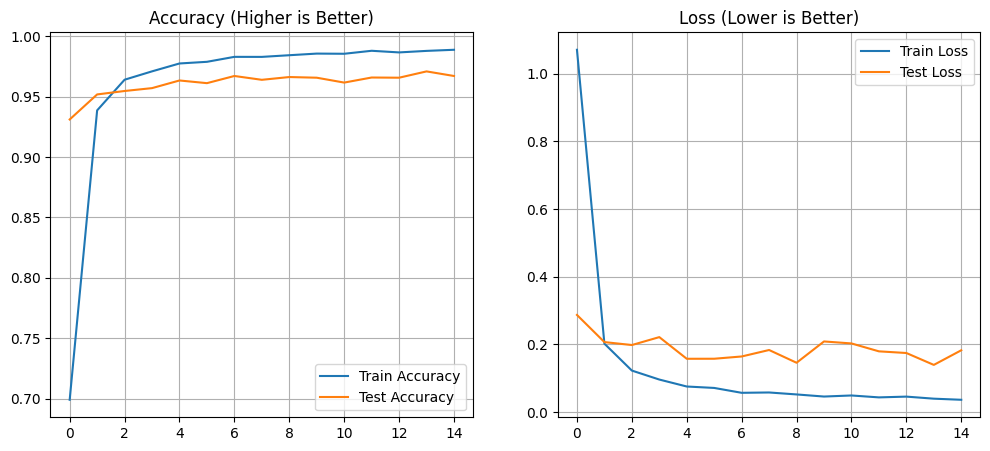

In [ ]:
# 1. TRAIN THE CNN
# We increase epochs to 15 because this model has more "stamina" to keep learning
history_cnn = model.fit(X_train_norm, y_train,
                        epochs=15,
                        validation_data=(X_test_norm, y_test))

# 2. PLOT THE RESULTS
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy (Higher is Better)')
plt.legend()
plt.grid(True)

# Plot Loss (Error)
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Test Loss')
plt.title('Loss (Lower is Better)')
plt.legend()
plt.grid(True)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


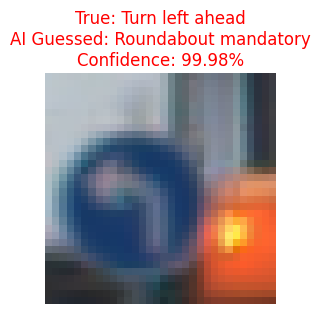

In [ ]:
import numpy as np

# 1. PICK A RANDOM IMAGE
# We pick a random index from the test data
idx = np.random.randint(0, len(X_test))
test_image = X_test[idx]
true_label_id = y_test[idx]

# 2. PREPARE THE IMAGE
# The model expects a batch of images, not just one.
# So we add a "fake" dimension to make it (1, 32, 32, 3)
# We also must normalize it (divide by 255) just like we did in training!
test_image_processed = np.expand_dims(test_image, axis=0)
test_image_processed = test_image_processed.astype('float32') / 255.0

# 3. ASK THE MODEL TO PREDICT
prediction_probabilities = model.predict(test_image_processed)
predicted_label_id = np.argmax(prediction_probabilities) # Pick the highest probability

# 4. SHOW RESULTS
plt.figure(figsize=(3,3))
plt.imshow(test_image)
plt.axis('off')

# Get the names from our dictionary
true_name = label_map[true_label_id]
predicted_name = label_map[predicted_label_id]
confidence = np.max(prediction_probabilities) * 100

# Color code the title (Green if correct, Red if wrong)
color = 'green' if true_label_id == predicted_label_id else 'red'

plt.title(f"True: {true_name}\nAI Guessed: {predicted_name}\nConfidence: {confidence:.2f}%", color=color)
plt.show()

In [ ]:
# Save the entire model (architecture + weights)
model.save('my_traffic_sign_model.h5')

print("Model saved successfully as 'my_traffic_sign_model.h5'")

Model saved successfully as 'my_traffic_sign_model.h5'


In [ ]:
# Save in the modern Keras format
model.save('my_traffic_sign_model.keras')

print("Model saved successfully as 'my_traffic_sign_model.keras'")

Model saved successfully as 'my_traffic_sign_model.keras'


Please upload your image file:


Saving my_test_image_3.png to my_test_image_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


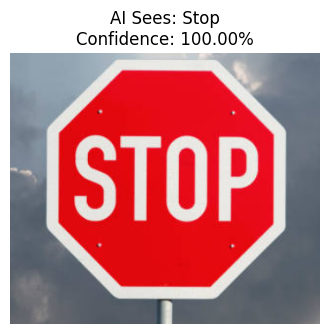

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

# 1. UPLOAD THE IMAGE
print("Please upload your image file:")
uploaded = files.upload()

for fn in uploaded.keys():
  # Get the filename
  path = fn

  # 2. LOAD & RESIZE
  # We force the image to be 32x32 pixels to fit the model's input requirement
  img = image.load_img(path, target_size=(32, 32))

  # 3. PREPROCESS
  # Convert to array
  x = image.img_to_array(img)
  # Expand dimensions (make it a "batch" of 1 image) -> (1, 32, 32, 3)
  x = np.expand_dims(x, axis=0)
  # Normalize (0 to 1 range)
  x = x.astype('float32') / 255.0

  # 4. PREDICT
  predictions = model.predict(x)
  predicted_class = np.argmax(predictions)
  confidence = np.max(predictions) * 100

  # 5. SHOW RESULTS
  # We load the original (big) image just for display purposes
  display_img = image.load_img(path)

  plt.figure(figsize=(4,4))
  plt.imshow(display_img)
  plt.axis('off')
  plt.title(f"AI Sees: {label_map[predicted_class]}\nConfidence: {confidence:.2f}%")
  plt.show()

In [ ]:
from tensorflow.keras.models import Model

# 1. CREATE A MINI-MODEL
# We create a new model that just returns the output of the FIRST Convolution layer
# This lets us "intercept" the signal before it goes deeper
layer_outputs = [layer.output for layer in model.layers[:2]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# 2. FEED THE STOP SIGN
# We use the same image you just uploaded (test_image_processed)
activations = activation_model.predict(test_image_processed)

# 3. VISUALIZE THE FILTERS
# We will show the first 16 "views" (filters) the AI has of the image
first_layer_activation = activations[0]

plt.figure(figsize=(16, 16))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    # Display the i-th filter's view
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.show()

AttributeError: The layer sequential_1 has never been called and thus has no defined input.

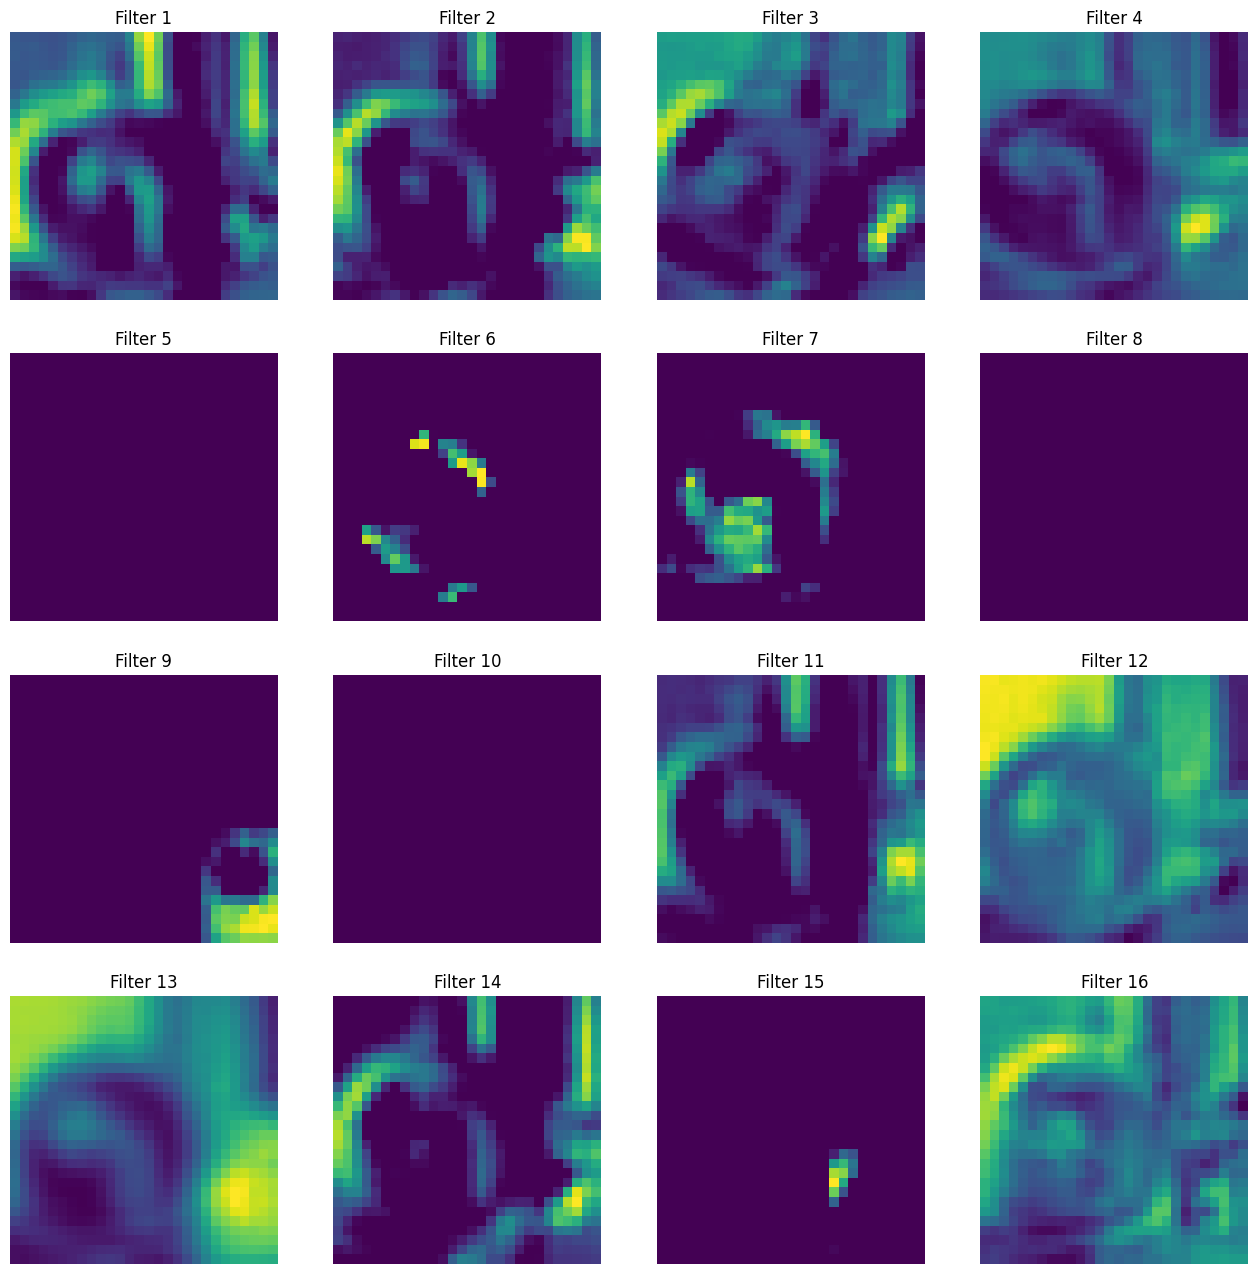

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. GRAB THE FIRST LAYER
# We just want to see what the first "Magnifying Glass" (Conv2D) sees.
first_layer = model.layers[0]

# 2. PUSH THE IMAGE THROUGH MANUALLY
# We feed our stop sign image directly into the layer
# .numpy() converts the TensorFlow tensor back to standard numbers we can plot
feature_maps = first_layer(test_image_processed).numpy()

# 3. VISUALIZE THE FILTERS
# feature_maps shape is (1, 28, 28, 32) -> 1 Image, 28x28 size, 32 filters
plt.figure(figsize=(16, 16))

# We will look at the first 16 filters
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)

    # Grab the i-th filter
    # [0, :, :, i] means: Image 0, All Rows, All Columns, Filter i
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')

    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.show()

In [ ]:
import pickle

# 1. DEFINE THE DICTIONARY (Just to be safe, we redefine it here)
label_map = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield',
    14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work',
    26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead',
    34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right',
    37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

# 2. SAVE IT TO A FILE
with open('label_map.pkl', 'wb') as f:
    pickle.dump(label_map, f)

print("Dictionary saved as 'label_map.pkl'")

Dictionary saved as 'label_map.pkl'


In [ ]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
import pickle

# 1. LOAD THE SAVED RESOURCES
# We use @st.cache_resource so we only load the heavy model ONCE, not every time a user clicks.
@st.cache_resource
def load_my_model():
    model = tf.keras.models.load_model('my_traffic_sign_model.keras')
    return model

@st.cache_resource
def load_labels():
    with open('label_map.pkl', 'rb') as f:
        labels = pickle.load(f)
    return labels

model = load_my_model()
labels = load_labels()

# 2. CREATE THE WEBSITE HEADER
st.title("🚦 Traffic Sign Recognition AI")
st.write("Upload a traffic sign image, and the Neural Network will identify it!")

# 3. CREATE THE UPLOAD BUTTON
file = st.file_uploader("Choose a traffic sign image...", type=["jpg", "png", "jpeg"])

# 4. THE LOGIC
if file is not None:
    # Display the user's image
    image = Image.open(file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    st.write("")
    st.write("🤖 Classifying...")

    # Preprocess the image (EXACTLY same as we did in training)
    # Resize to 32x32
    img = image.resize((32, 32))
    # Convert to array
    img_array = np.array(img)
    # If image has 4 channels (PNG transparent), convert to 3 (RGB)
    if img_array.shape[2] == 4:
        img_array = img_array[:,:,:3]

    # Expand dimensions to (1, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize
    img_array = img_array.astype('float32') / 255.0

    # Predict
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0]) # Get confidence scores

    class_index = np.argmax(predictions)
    class_name = labels[class_index]
    confidence = np.max(predictions) * 100

    # Show Result
    st.success(f"Prediction: {class_name}")
    st.info(f"Confidence: {confidence:.2f}%")

    # Progress bar for confidence
    st.progress(int(confidence))

Writing app.py


In [ ]:
# 1. GET YOUR PUBLIC IP (You need this for the password)
!wget -q -O - ipv4.icanhazip.com

# 2. RUN STREAMLIT IN BACKGROUND & CREATE TUNNEL
# This installs the tunnel tool and connects port 8501 (Streamlit) to the world
!streamlit run app.py & npx localtunnel --port 8501


y
34.171.181.197
o
⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://olive-baboons-listen.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.171.181.197:8501

2025-12-26 18:15:01.172848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766772901.215976   46421 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766772901.228608   46421 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766772901.258808   46421 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W

In [ ]:
# 1. INSTALL GRADIO
!pip install -q gradio

import gradio as gr
import tensorflow as tf
import numpy as np
import pickle

# 2. LOAD YOUR BRAIN (The Model & Labels)
model = tf.keras.models.load_model('my_traffic_sign_model.keras')

with open('label_map.pkl', 'rb') as f:
    labels = pickle.load(f)

# 3. DEFINE THE PREDICTION FUNCTION
# This function takes the image from the UI and returns the answer
def classify_sign(image):
    if image is None:
        return None

    # Resize the image to 32x32 (The size the model expects)
    # Gradio gives us the image as a Numpy array automatically
    image = tf.image.resize(image, (32, 32))

    # Normalize (0 to 1) and expand dimensions (1, 32, 32, 3)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0

    # Predict
    prediction = model.predict(image)

    # Get the dictionary of {Label: Confidence}
    # This tells Gradio to draw those cool progress bars
    confidences = {labels[i]: float(prediction[0][i]) for i in range(len(labels))}

    return confidences

# 4. LAUNCH THE APP
# inputs=gr.Image() -> Creates a Drag-and-Drop box
# outputs=gr.Label() -> Creates a Prediction Bar Chart
demo = gr.Interface(
    fn=classify_sign,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=3),
    title="🚦 Traffic Sign Recognition AI",
    description="Upload a traffic sign image to test the Neural Network."
)

# share=True creates the public link!
demo.launch(share=True, debug=True)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4d04bfd7dd303a652e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Created dataset file at: .gradio/flagged/dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4d04bfd7dd303a652e.gradio.live


In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

# 1. RELOAD DATA (We need to start fresh to resize it)
# Check if data is already downloaded; if not, re-download (standard check)
if not os.path.exists('traffic-signs-data.zip'):
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
    dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
    data_dir = os.path.dirname(dataset_path)
else:
    data_dir = '.' # If you are in the same folder

with open(os.path.join(data_dir, 'train.p'), mode='rb') as f:
    train_data = pickle.load(f)
with open(os.path.join(data_dir, 'test.p'), mode='rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# 2. THE UPGRADE: RESIZE TO 75x75
# MobileNet works best with images larger than 32x32.
# This might take 30-60 seconds.
print("Resizing images to 75x75... this takes a moment.")
import cv2 # Computer Vision library

def resize_images(data):
    resized_data = []
    for img in data:
        # Resize image to 75x75 pixels
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# 3. NORMALIZE (MobileNet expects -1 to 1 range, or 0 to 1)
# We will stick to 0-1 for simplicity
X_train_norm = X_train_resized.astype('float32') / 255.0
X_test_norm = X_test_resized.astype('float32') / 255.0

# 4. ONE-HOT ENCODING
# The "Pro" models prefer labels to be vectors (e.g., [0, 0, 1, 0...]) rather than integers (2)
y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

print(f"New Shape: {X_train_norm.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '/root/.keras/datasets/train.p'

In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# 1. FORCE DOWNLOAD & EXTRACT (Foolproof method)
print("Downloading and extracting data...")
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

# We download explicitly to the current folder so we can see it
dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
data_dir = os.path.dirname(dataset_path)

# Double check the path exists
print(f"Data is located at: {data_dir}")

# 2. LOAD DATA
with open(os.path.join(data_dir, 'train.p'), mode='rb') as f:
    train_data = pickle.load(f)
with open(os.path.join(data_dir, 'test.p'), mode='rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# 3. RESIZE TO 75x75 (For MobileNet)
print("Resizing images to 75x75... (This takes about 30 seconds)")
def resize_images(data):
    resized_data = []
    for img in data:
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# 4. NORMALIZE & ENCODE
X_train_norm = X_train_resized.astype('float32') / 255.0
X_test_norm = X_test_resized.astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

print("--- SUCCESS ---")
print(f"New Data Shape: {X_train_norm.shape}")

Data is located at: /root/.keras/datasets


FileNotFoundError: [Errno 2] No such file or directory: '/root/.keras/datasets/train.p'

In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
import glob

# 1. DOWNLOAD (Force simple extract)
print("Downloading data...")
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
data_root = os.path.dirname(dataset_path)

# 2. SEARCH AND RESCUE (Find where 'train.p' is hiding)
print(f"Searching for data in {data_root}...")
# Look for any file ending in 'train.p' recursively
found_files = glob.glob(os.path.join(data_root, '**', 'train.p'), recursive=True)

if not found_files:
    raise FileNotFoundError("Could not find 'train.p' anywhere! Download might have failed.")

train_path = found_files[0]
# The test.p file should be in the same folder
test_path = train_path.replace('train.p', 'test.p')

print(f"FOUND DATA AT: {train_path}")

# 3. LOAD DATA
with open(train_path, mode='rb') as f:
    train_data = pickle.load(f)
with open(test_path, mode='rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# 4. RESIZE TO 75x75 (For MobileNet)
print("Resizing images to 75x75... (This takes about 30 seconds)")
def resize_images(data):
    resized_data = []
    for img in data:
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# 5. NORMALIZE & ENCODE
X_train_norm = X_train_resized.astype('float32') / 255.0
X_test_norm = X_test_resized.astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

print("--- SUCCESS ---")
print(f"New Data Shape: {X_train_norm.shape}")

Searching for data in /root/.keras/datasets...
FOUND DATA AT: /root/.keras/datasets/traffic-signs-data_extracted/train.p
Resizing images to 75x75... (This takes about 30 seconds)
--- SUCCESS ---
New Data Shape: (34799, 75, 75, 3)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# 1. DOWNLOAD THE BASE MODEL
# include_top=False: We chop off the final "Classification Layer" (which classifies Cats/Dogs/etc)
# weights='imagenet': We want the "Professor" weights, not random ones.
# input_shape=(75, 75, 3): Our new image size
base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')

# 2. FREEZE THE BASE
# We don't want to mess up the Professor's brain. We only want to train our new layers.
base_model.trainable = False

# 3. ADD OUR "TRAFFIC SIGN" HEAD
x = base_model.output
x = GlobalAveragePooling2D()(x) # A smarter way to Flatten
x = Dense(128, activation='relu')(x) # Our custom thinking layer
x = Dropout(0.2)(x) # Prevent overfitting
predictions = Dense(43, activation='softmax')(x) # 43 Traffic Signs

# 4. COMBINE THEM
transfer_model = Model(inputs=base_model.input, outputs=predictions)

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("MobileNetV2 loaded. Total params:", transfer_model.count_params())

/tmp/ipython-input-4213719239.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 loaded. Total params: 2427499


Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 257s 230ms/step - accuracy: 0.3733 - loss: 2.2176 - val_accuracy: 0.5393 - val_loss: 1.4234
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 280s 247ms/step - accuracy: 0.6139 - loss: 1.1807 - val_accuracy: 0.5660 - val_loss: 1.3613
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 289s 216ms/step - accuracy: 0.6841 - loss: 0.9529 - val_accuracy: 0.5626 - val_loss: 1.3856
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 272s 226ms/step - accuracy: 0.7191 - loss: 0.8397 - val_accuracy: 0.5804 - val_loss: 1.4253
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 253s 233ms/step - accuracy: 0.7503 - loss: 0.7460 - val_accuracy: 0.5760 - val_loss: 1.4462
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 262s 241ms/step - accuracy: 0.7721 - loss: 0.6879 - val_accuracy: 0.5656 - val_loss: 1.5089
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 250s 230ms/step - accuracy: 0.7881 - loss: 0.6315 - val_accuracy: 0.5918 - val_loss: 1.5545
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 244s 224ms/step - ac

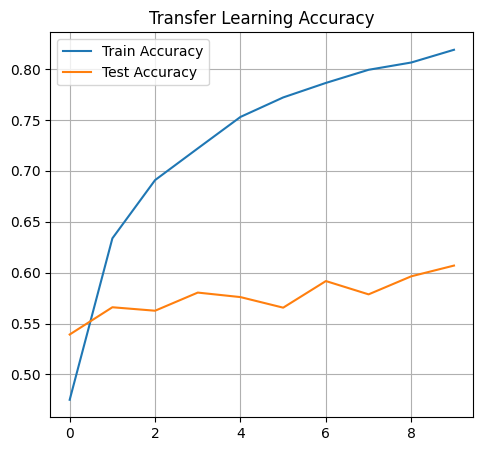

In [ ]:
# TRAIN THE TRANSFER MODEL
# We only need 10 epochs because the "Professor" learns very fast
history_transfer = transfer_model.fit(
    X_train_norm, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_norm, y_test_one_hot)
)

# PLOT THE COMPARISON
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Train Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Test Accuracy')
plt.title('Transfer Learning Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. CORRECT PREPROCESSING (The "Sunglasses")
# Instead of dividing by 255 manually, we use MobileNet's own function
# This maps 0-255 pixels to -1 to +1 range automatically
X_train_preprocessed = preprocess_input(X_train_resized.astype('float32'))
X_test_preprocessed = preprocess_input(X_test_resized.astype('float32'))

# 2. DEFINE MODEL (With a slight tweak)
# We add a bit more power to the custom layers
base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
base_model.trainable = False # Start frozen

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x) # Increased to 256 neurons
x = Dropout(0.5)(x) # Increased dropout to handle the new power
predictions = Dense(43, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

# 3. COMPILE & TRAIN
# We use a lower learning rate (0.0001) because the pre-trained weights are sensitive
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

print("Training with Correct Preprocessing...")
history_transfer = transfer_model.fit(
    X_train_preprocessed, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_preprocessed, y_test_one_hot)
)

NameError: name 'X_train_resized' is not defined

In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# --- STEP 1: LOAD & PREPARE DATA ---
print("1. Checking Data...")
# Check if file exists, if not download
if not os.path.exists('traffic-signs-data.zip'):
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
    dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
    data_root = os.path.dirname(dataset_path)
else:
    # If already downloaded, just find the path
    data_root = os.path.dirname(tf.keras.utils.get_file("traffic-signs-data.zip", origin=""))

# Find the train.p file recursively
found_files = glob.glob(os.path.join(data_root, '**', 'train.p'), recursive=True)
if not found_files:
    # Fallback search in current directory
    found_files = glob.glob('**/train.p', recursive=True)

if not found_files:
    raise FileNotFoundError("Could not find 'train.p'. Please try Factory Resetting runtime.")

train_path = found_files[0]
test_path = train_path.replace('train.p', 'test.p')

print(f"   Loading from: {train_path}")
with open(train_path, mode='rb') as f:
    train_data = pickle.load(f)
with open(test_path, mode='rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# --- STEP 2: RESIZE & PREPROCESS ---
print("2. Resizing images to 75x75 (MobileNet Size)...")
# MobileNet needs 75x75 minimum. This takes ~30 seconds.
def resize_images(data):
    resized_data = []
    for img in data:
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

print("3. Preprocessing (The 'Sunglasses' Step)...")
# CRITICAL: We use MobileNet's built-in tool to fix colors
X_train_preprocessed = preprocess_input(X_train_resized.astype('float32'))
X_test_preprocessed = preprocess_input(X_test_resized.astype('float32'))

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

# --- STEP 3: BUILD THE "PROFESSOR" MODEL ---
print("4. Building MobileNetV2...")
base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
base_model.trainable = False # Start frozen

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# --- STEP 4: TRAIN ---
print("5. Training (Sit back, this works fast)...")
history_transfer = transfer_model.fit(
    X_train_preprocessed, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_preprocessed, y_test_one_hot)
)

print(f"Final Test Accuracy: {history_transfer.history['val_accuracy'][-1]*100:.2f}%")

1. Checking Data...
123524425/123524425 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
   Loading from: /root/.keras/datasets/traffic-signs-data_extracted/train.p
2. Resizing images to 75x75 (MobileNet Size)...
3. Preprocessing (The 'Sunglasses' Step)...
4. Building MobileNetV2...


/tmp/ipython-input-1066648401.py:67: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5. Training (Sit back, this works fast)...
Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 252s 226ms/step - accuracy: 0.2473 - loss: 3.0470 - val_accuracy: 0.4864 - val_loss: 1.7065
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 249s 229ms/step - accuracy: 0.5327 - loss: 1.5572 - val_accuracy: 0.5519 - val_loss: 1.4702
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 244s 225ms/step - accuracy: 0.6231 - loss: 1.2097 - val_accuracy: 0.5755 - val_loss: 1.3667
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 276s 238ms/step - accuracy: 0.6839 - loss: 1.0021 - val_accuracy: 0.5891 - val_loss: 1.3087
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 239s 220ms/step - accuracy: 0.7258 - loss: 0.8642 - val_accuracy: 0.5979 - val_loss: 1.2864
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 261s 240ms/step - accuracy: 0.7499 - loss: 0.7870 - val_accuracy: 0.5986 - val_loss: 1.2806
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 238s 219ms/step - accuracy: 0.7734 - loss: 0.7104 - val_accura

In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- STEP 1: LOAD DATA ---
print("1. Loading Data...")
if not os.path.exists('traffic-signs-data.zip'):
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
    dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
    data_dir = os.path.dirname(dataset_path)
else:
    data_dir = os.path.dirname(tf.keras.utils.get_file("traffic-signs-data.zip", origin=""))

# Find train.p
found_files = glob.glob(os.path.join(data_dir, '**', 'train.p'), recursive=True)
if not found_files: found_files = glob.glob('**/train.p', recursive=True)
train_path = found_files[0]
test_path = train_path.replace('train.p', 'test.p')

with open(train_path, mode='rb') as f: train_data = pickle.load(f)
with open(test_path, mode='rb') as f: test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# --- STEP 2: RESIZE TO 96x96 & PREPROCESS ---
print("2. Resizing to 96x96 (Better Vision)... this takes ~60s")
def resize_images(data):
    resized_data = []
    for img in data:
        img = cv2.resize(img, (96, 96)) # Increased from 75 to 96
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# Free up memory
del X_train, X_test, train_data, test_data

print("3. Preprocessing & Augmenting...")
X_train_pre = preprocess_input(X_train_resized.astype('float32'))
X_test_pre = preprocess_input(X_test_resized.astype('float32'))
y_train_hot = to_categorical(y_train, 43)
y_test_hot = to_categorical(y_test, 43)

# DATA AUGMENTATION (The Cure for Overfitting)
# Randomly rotate, zoom, and shift images during training
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train_pre)

# --- STEP 3: BUILD THE "FINE-TUNED" MODEL ---
print("4. Building Fine-Tuned MobileNetV2...")
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# UNFREEZE the top 30 layers (Fine Tuning)
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Use a lower learning rate because we are fine-tuning
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# --- STEP 4: TRAIN WITH AUGMENTATION ---
print("5. Training (10 Epochs)...")
history_transfer = transfer_model.fit(
    datagen.flow(X_train_pre, y_train_hot, batch_size=32),
    epochs=10,
    validation_data=(X_test_pre, y_test_hot)
)

1. Loading Data...
2. Resizing to 96x96 (Better Vision)... this takes ~60s
3. Preprocessing & Augmenting...


In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
import glob
import gc # Garbage Collector to free RAM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- STEP 1: LOAD DATA ---
print("1. Loading Data...")
# Check/Download
if not os.path.exists('traffic-signs-data.zip'):
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
    dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
    data_dir = os.path.dirname(dataset_path)
else:
    data_dir = os.path.dirname(tf.keras.utils.get_file("traffic-signs-data.zip", origin=""))

found_files = glob.glob(os.path.join(data_dir, '**', 'train.p'), recursive=True)
if not found_files: found_files = glob.glob('**/train.p', recursive=True)
train_path = found_files[0]
test_path = train_path.replace('train.p', 'test.p')

with open(train_path, mode='rb') as f: train_data = pickle.load(f)
with open(test_path, mode='rb') as f: test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# Delete the big dictionary to save RAM immediately
del train_data, test_data
gc.collect()

# --- STEP 2: RESIZE TO 75x75 & PREPROCESS ---
print("2. Resizing to 75x75 (RAM Safe Mode)...")
# We stick to 75x75 to prevent crashing
def resize_images(data):
    resized_data = []
    for img in data:
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# DELETE RAW DATA INSTANTLY
del X_train, X_test
gc.collect() # Force RAM cleanup

print("3. Preprocessing & Augmenting...")
# Convert to Float32 and Preprocess in place
X_train_pre = preprocess_input(X_train_resized.astype('float32'))
X_test_pre = preprocess_input(X_test_resized.astype('float32'))

# DELETE RESIZED DATA INSTANTLY
del X_train_resized, X_test_resized
gc.collect()

y_train_hot = to_categorical(y_train, 43)
y_test_hot = to_categorical(y_test, 43)

# DATA AUGMENTATION (The Magic Ingredient)
datagen = ImageDataGenerator(
    rotation_range=12,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train_pre)

# --- STEP 3: BUILD THE "FINE-TUNED" MODEL ---
print("4. Building MobileNetV2 with Fine Tuning...")
base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')

# UNFREEZE the top 40 layers to let the Professor adapt
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# --- STEP 4: TRAIN ---
print("5. Training (12 Epochs)...")
history_transfer = transfer_model.fit(
    datagen.flow(X_train_pre, y_train_hot, batch_size=32),
    epochs=12,
    validation_data=(X_test_pre, y_test_hot)
)

print(f"Final Test Accuracy: {history_transfer.history['val_accuracy'][-1]*100:.2f}%")

1. Loading Data...
123524425/123524425 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
2. Resizing to 75x75 (RAM Safe Mode)...
3. Preprocessing & Augmenting...
4. Building MobileNetV2 with Fine Tuning...


/tmp/ipython-input-1072690742.py:81: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5. Training (12 Epochs)...
Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 506s 453ms/step - accuracy: 0.3755 - loss: 2.3910 - val_accuracy: 0.7014 - val_loss: 0.9883
Epoch 2/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 488s 449ms/step - accuracy: 0.7813 - loss: 0.6999 - val_accuracy: 0.7641 - val_loss: 0.8539
Epoch 3/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 483s 444ms/step - accuracy: 0.8779 - loss: 0.3828 - val_accuracy: 0.8088 - val_loss: 0.6783
Epoch 4/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 458s 421ms/step - accuracy: 0.9178 - loss: 0.2609 - val_accuracy: 0.8211 - val_loss: 0.6842
Epoch 5/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 458s 421ms/step - accuracy: 0.9377 - loss: 0.1943 - val_accuracy: 0.8093 - val_loss: 0.8078
Epoch 6/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 458s 421ms/step - accuracy: 0.9439 - loss: 0.1724 - val_accuracy: 0.8257 - val_loss: 0.7771
Epoch 7/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 459s 422ms/step - accuracy: 0.9535 - loss: 0.1478 - val_accuracy: 0.8475 - val_loss: 0.6186
Epoch 8/12
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 527s 445ms/step - accuracy: 0.9

Upload your 13 Field Work images:


Saving my_test_1.png to my_test_1 (1).png

Processing 1 images...
Generated 3 new augmented samples.
Displaying a sample of the 'Hard' data:


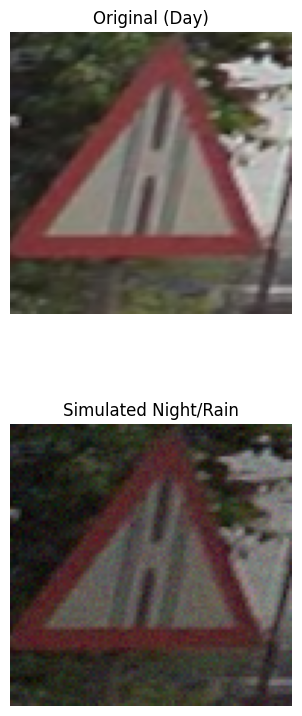

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. DEFINE OUR "Destruction" TOOLS
def apply_darkness(img):
    # Reduce brightness by 30% to 70% randomly
    factor = np.random.uniform(0.3, 0.7)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = hsv[:, :, 2] * factor
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def apply_blur(img):
    # Apply random Motion Blur
    kernel_size = np.random.choice([5, 7, 9])
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def apply_noise(img):
    # Add "Rain" or Camera Grain
    row, col, ch = img.shape
    mean = 0
    var = 50
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = img + gauss
    return np.clip(noisy, 0, 255).astype('uint8')

# 2. UPLOAD YOUR 13 IMAGES
print("Upload your 13 Field Work images:")
uploaded = files.upload()

# 3. GENERATE THE DATASET
augmented_images = []
original_images = []

print(f"\nProcessing {len(uploaded)} images...")

for filename in uploaded.keys():
    # Load image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (96, 96)) # Resize to match our model

    original_images.append(img)

    # Create 3 Variations for each image
    # Variant 1: Darkness (Evening time)
    aug1 = apply_darkness(img)
    augmented_images.append(aug1)

    # Variant 2: Blur (Moving car)
    aug2 = apply_blur(img)
    augmented_images.append(aug2)

    # Variant 3: Darkness + Noise (Stormy Night)
    aug3 = apply_noise(apply_darkness(img))
    augmented_images.append(aug3)

# 4. VISUALIZE THE RESULTS
# Show a few examples of "Before vs After"
print(f"Generated {len(augmented_images)} new augmented samples.")
print("Displaying a sample of the 'Hard' data:")

plt.figure(figsize=(15, 8))
for i in range(5): # Show top 5
    # Original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(original_images[i])
    plt.title("Original (Day)")
    plt.axis('off')

    # Augmented (The "Hard" version)
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(augmented_images[i*3 + 2]) # Show the "Stormy Night" version
    plt.title("Simulated Night/Rain")
    plt.axis('off')

plt.tight_layout()
plt.show()

Upload your 'field_data.zip' file:


Saving Field_image.zip to Field_image (1).zip
Unzipping images...
Found 13 images. Starting Digital Darkroom...
--- COMPLETE ---
Input: 13 images
Output: 39 augmented samples generated.


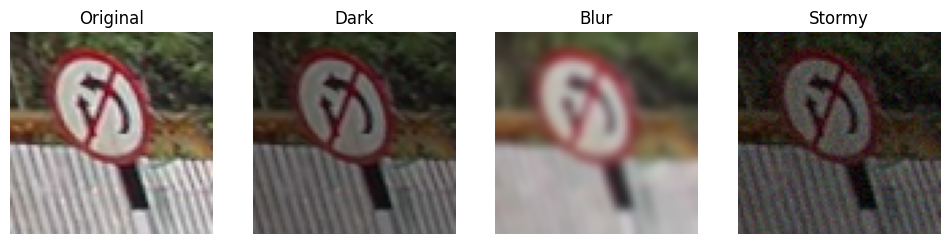

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import shutil
from google.colab import files

# --- 1. DEFINE AUGMENTATION TOOLS ---
def apply_darkness(img):
    factor = np.random.uniform(0.4, 0.6) # Make it 30-70% darker
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = hsv[:, :, 2] * factor
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def apply_blur(img):
    kernel_size = np.random.choice([5, 7, 9]) # Random blur strength
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def apply_noise(img):
    row, col, ch = img.shape
    mean = 0
    var = 50
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = img + gauss
    return np.clip(noisy, 0, 255).astype('uint8')

# --- 2. UPLOAD & UNZIP ---
print("Upload your 'field_data.zip' file:")
uploaded = files.upload()

# Get the zip filename
zip_name = list(uploaded.keys())[0]

print("Unzipping images...")
extract_path = "raw_field_images"
if os.path.exists(extract_path):
    shutil.rmtree(extract_path)
os.makedirs(extract_path)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# --- 3. PROCESS THE IMAGES ---
augmented_images = []
original_images = []

# Find all images in the extracted folder (ignoring hidden files)
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp"}
image_paths = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if os.path.splitext(file)[1].lower() in valid_extensions:
            image_paths.append(os.path.join(root, file))

print(f"Found {len(image_paths)} images. Starting Digital Darkroom...")

for path in image_paths:
    # Load Image
    img = cv2.imread(path)
    if img is None: continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (75, 75)) # Resize to match Model V4

    original_images.append(img)

    # Generate 3 Variations
    # 1. Dark
    augmented_images.append(apply_darkness(img))
    # 2. Blurred
    augmented_images.append(apply_blur(img))
    # 3. Stormy (Dark + Noise)
    augmented_images.append(apply_noise(apply_darkness(img)))

print(f"--- COMPLETE ---")
print(f"Input: {len(original_images)} images")
print(f"Output: {len(augmented_images)} augmented samples generated.")

# --- 4. PREVIEW ---
plt.figure(figsize=(12, 6))
# Show first original and its 3 variations
plt.subplot(1, 4, 1); plt.imshow(original_images[0]); plt.title("Original"); plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(augmented_images[0]); plt.title("Dark"); plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(augmented_images[1]); plt.title("Blur"); plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(augmented_images[2]); plt.title("Stormy"); plt.axis('off')
plt.show()

Testing Model on 39 'Nightmare' Images...
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


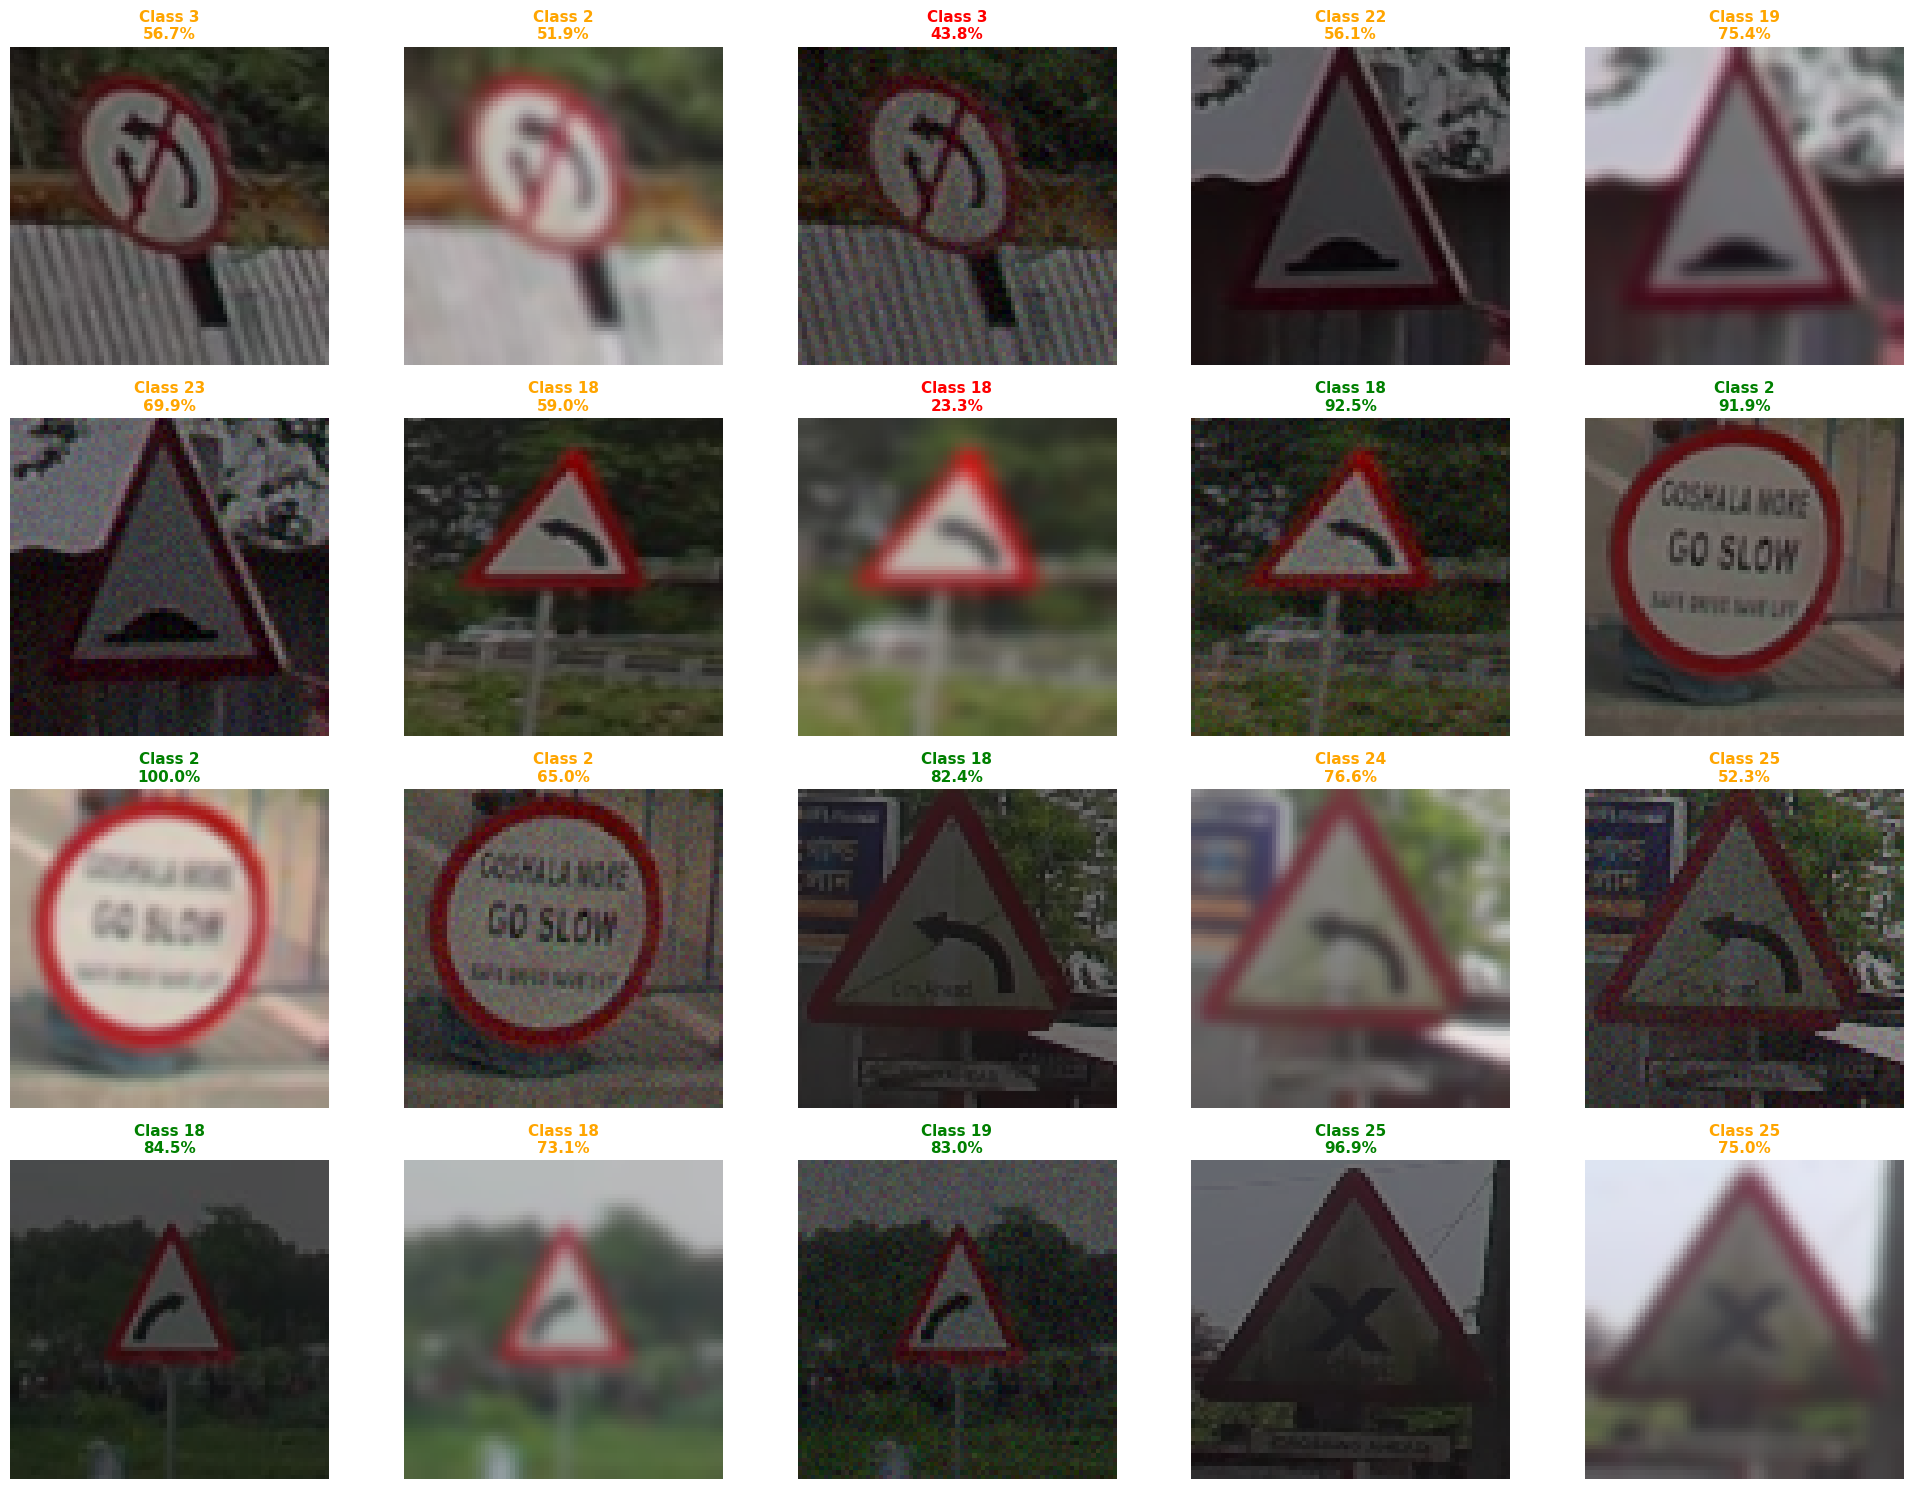

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. PREPARE THE EXAM DATA
# We use the 'augmented_images' list that is already in memory
print(f"Testing Model on {len(augmented_images)} 'Nightmare' Images...")

# Resize to 75x75 (The size our V4 model expects)
batch_images = []
for img in augmented_images:
    img_resized = cv2.resize(img, (75, 75))
    batch_images.append(img_resized)

# Convert to array and Preprocess (Apply 'Sunglasses')
batch_array = np.array(batch_images).astype('float32')
batch_preprocessed = preprocess_input(batch_array)

# 2. RUN THE PREDICTION
predictions = transfer_model.predict(batch_preprocessed)

# 3. SHOW THE REPORT CARD
# We will show the first 20 images to get a good sample
limit = 20
rows = 4
cols = 5

plt.figure(figsize=(20, 15))

for i in range(min(len(augmented_images), limit)):
    ax = plt.subplot(rows, cols, i + 1)

    # Get the answer
    confidence = np.max(predictions[i]) * 100
    class_id = np.argmax(predictions[i])

    # Map class_id to English name (Safety check for dictionary)
    try:
        label = label_map[class_id]
    except:
        label = f"Class {class_id}"

    # Display Image
    plt.imshow(augmented_images[i])
    plt.axis('off')

    # Grading System:
    # Green = Confident (>80%)
    # Orange = Unsure (50-80%)
    # Red = Confused (<50%)
    if confidence > 80:
        color = 'green'
    elif confidence > 50:
        color = 'orange'
    else:
        color = 'red'

    plt.title(f"{label}\n{confidence:.1f}%", color=color, fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
# RELOAD THE DICTIONARY
label_map = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield',
    14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work',
    26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead',
    34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right',
    37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}
print("Dictionary Reloaded!")

Dictionary Reloaded!


Testing Model on 39 'Nightmare' Images...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


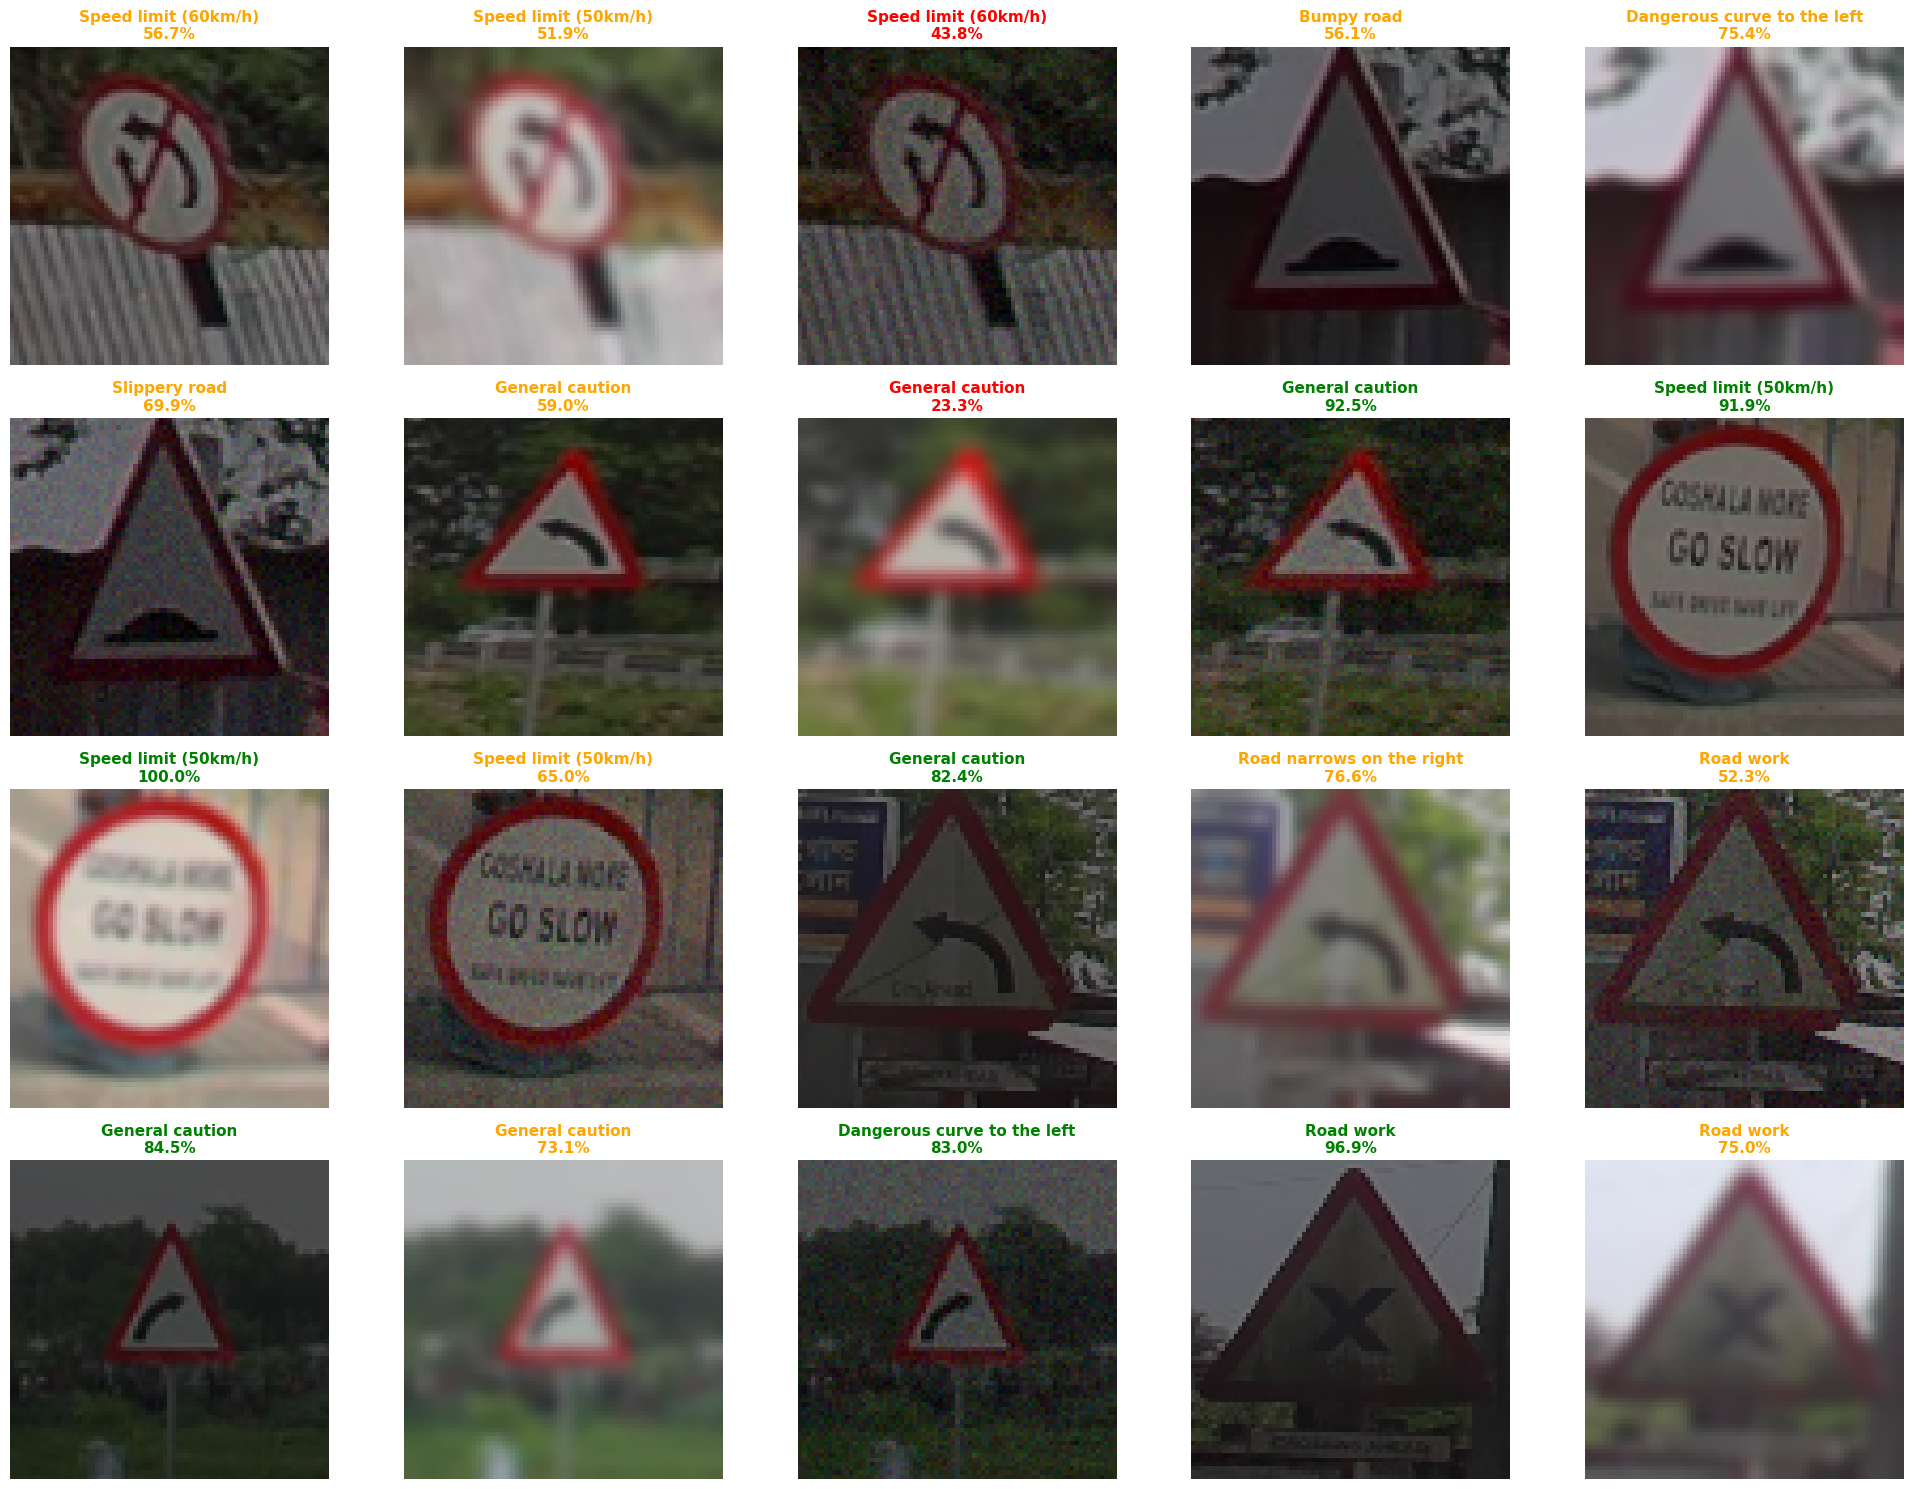

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. PREPARE THE EXAM DATA
# We use the 'augmented_images' list that is already in memory
print(f"Testing Model on {len(augmented_images)} 'Nightmare' Images...")

# Resize to 75x75 (The size our V4 model expects)
batch_images = []
for img in augmented_images:
    img_resized = cv2.resize(img, (75, 75))
    batch_images.append(img_resized)

# Convert to array and Preprocess (Apply 'Sunglasses')
batch_array = np.array(batch_images).astype('float32')
batch_preprocessed = preprocess_input(batch_array)

# 2. RUN THE PREDICTION
predictions = transfer_model.predict(batch_preprocessed)

# 3. SHOW THE REPORT CARD
# We will show the first 20 images to get a good sample
limit = 20
rows = 4
cols = 5

plt.figure(figsize=(20, 15))

for i in range(min(len(augmented_images), limit)):
    ax = plt.subplot(rows, cols, i + 1)

    # Get the answer
    confidence = np.max(predictions[i]) * 100
    class_id = np.argmax(predictions[i])

    # Map class_id to English name (Safety check for dictionary)
    try:
        label = label_map[class_id]
    except:
        label = f"Class {class_id}"

    # Display Image
    plt.imshow(augmented_images[i])
    plt.axis('off')

    # Grading System:
    # Green = Confident (>80%)
    # Orange = Unsure (50-80%)
    # Red = Confused (<50%)
    if confidence > 80:
        color = 'green'
    elif confidence > 50:
        color = 'orange'
    else:
        color = 'red'

    plt.title(f"{label}\n{confidence:.1f}%", color=color, fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import shutil
from google.colab import files

# 1. SETUP FOLDER
save_folder = "final_test_data"
if os.path.exists(save_folder):
    shutil.rmtree(save_folder)
os.makedirs(save_folder)

print(f"Saving {len(augmented_images)} images to '{save_folder}'...")

# 2. SAVE IMAGES FROM MEMORY TO DISK
for i, img in enumerate(augmented_images):
    # CRITICAL: Convert RGB (what AI sees) back to BGR (what OpenCV saves)
    # If we skip this, your red Stop signs will look Blue!
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Save file
    filename = f"{save_folder}/image_{i}_stress_test.jpg"
    cv2.imwrite(filename, img_bgr)

# 3. ZIP AND DOWNLOAD
print("Zipping...")
shutil.make_archive("Indian_Road_Stress_Test", 'zip', save_folder)

print("Downloading now...")
files.download("Indian_Road_Stress_Test.zip")

Saving 39 images to 'final_test_data'...
Zipping...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. DEFINE THE PREDICTION FUNCTION
# This is the "Brain" of the web app
def classify_image(image):
    if image is None:
        return None

    # Resize to 75x75 (Must match your model's input size)
    img_resized = cv2.resize(image, (75, 75))

    # Preprocess (The "Sunglasses" math)
    # Expand dims to make it look like a batch of 1: (1, 75, 75, 3)
    img_array = np.expand_dims(img_resized, axis=0).astype('float32')
    img_preprocessed = preprocess_input(img_array)

    # Predict
    prediction = transfer_model.predict(img_preprocessed)[0]

    # Get the Top 3 predictions to show the user
    # We create a dictionary {Label: Confidence} for Gradio to display
    confidences = {label_map[i]: float(prediction[i]) for i in range(43)}

    return confidences

# 2. CREATE THE INTERFACE
# input: An image upload box
# output: A label with a progress bar showing confidence
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=3),
    title="🇮🇳 Indian Traffic Sign Recognizer (MobileNetV2)",
    description="Upload a photo of a traffic sign to test the AI's robustness on Indian road conditions."
)

# 3. LAUNCH IT
# share=True creates a public link you can send to anyone for 72 hours!
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2ac2814d49fcd08160.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Keyboard interruption in main thread... closing server.


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
import glob
from tensorflow.keras.utils import to_categorical

# 1. FORCE DOWNLOAD & FIND DATA (Bulletproof method)
print("Downloading data...")
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
data_dir = os.path.dirname(dataset_path)

# Find where 'train.p' is hiding
found_files = glob.glob(os.path.join(data_dir, '**', 'train.p'), recursive=True)
if not found_files:
    raise FileNotFoundError("Could not find 'train.p'. Please Factory Reset runtime.")

train_path = found_files[0]
test_path = train_path.replace('train.p', 'test.p')

# 2. LOAD DATA
with open(train_path, mode='rb') as f:
    train_data = pickle.load(f)
with open(test_path, mode='rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# 3. RESIZE TO 75x75 (The Upgrade)
print("Upgrading images to 75x75 pixels... (This takes a moment)")
def resize_images(data):
    resized_data = []
    for img in data:
        # Resize image to 75x75 pixels
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# 4. PREPROCESS & ENCODE
# MobileNet likes inputs between -1 and 1
X_train_norm = X_train_resized.astype('float32') / 127.5 - 1
X_test_norm = X_test_resized.astype('float32') / 127.5 - 1

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

print("--- READY FOR THE PROFESSOR ---")
print(f"New Data Shape: {X_train_norm.shape}")

Upgrading images to 75x75 pixels... (This takes a moment)
--- READY FOR THE PROFESSOR ---
New Data Shape: (34799, 75, 75, 3)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. DOWNLOAD THE PRE-TRAINED BRAIN
# include_top=False: We chop off the classification layer (because we aren't classifying cats/dogs)
# weights='imagenet': We want the smart weights, not random ones.
base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')

# 2. FREEZE THE BASE
# We tell the model: "Don't change what you already know about lines and shapes."
base_model.trainable = False

# 3. ADD OUR CUSTOM LAYERS
x = base_model.output
x = GlobalAveragePooling2D()(x) # This flattens the 3D map into a 1D vector
x = Dense(256, activation='relu')(x) # A thinking layer
x = Dropout(0.5)(x) # Drop 50% of neurons to prevent memorization (Overfitting)
predictions = Dense(43, activation='softmax')(x) # The final answer (43 signs)

# 4. COMPILE
transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# 5. TRAIN
print("Starting training... (The Professor learns fast!)")
history = transfer_model.fit(
    X_train_norm, y_train_one_hot,
    batch_size=64, # Bigger batch size because the model is efficient
    epochs=10,
    validation_data=(X_test_norm, y_test_one_hot)
)

print(f"Final Test Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

/tmp/ipython-input-1676973850.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')


Starting training... (The Professor learns fast!)


In [ ]:
import tensorflow as tf
import os
import pickle
import numpy as np
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print("--- RECOVERY MODE INITIATED ---")

# 1. DOWNLOAD & LOAD DATA
print("1. Downloading Data...")
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
dataset_path = tf.keras.utils.get_file("traffic-signs-data.zip", origin=url, extract=True)
data_dir = os.path.dirname(dataset_path)

# Find 'train.p'
found_files = glob.glob(os.path.join(data_dir, '**', 'train.p'), recursive=True)
if not found_files:
    # Fallback if get_file put it somewhere else
    found_files = glob.glob('**/train.p', recursive=True)

train_path = found_files[0]
test_path = train_path.replace('train.p', 'test.p')

with open(train_path, mode='rb') as f:
    train_data = pickle.load(f)
with open(test_path, mode='rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# 2. RESIZE TO 75x75
print("2. Resizing images to 75x75 (MobileNet Standard)...")
def resize_images(data):
    resized_data = []
    for img in data:
        img = cv2.resize(img, (75, 75))
        resized_data.append(img)
    return np.array(resized_data)

X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# Free up memory immediately
del X_train, X_test, train_data, test_data

# 3. PREPROCESS (-1 to 1)
print("3. Normalizing data...")
X_train_norm = X_train_resized.astype('float32') / 127.5 - 1
X_test_norm = X_test_resized.astype('float32') / 127.5 - 1

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

# 4. BUILD THE PROFESSOR (MobileNetV2)
print("4. Loading MobileNetV2...")
base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
base_model.trainable = False # Freeze the brain

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# 5. TRAIN
print("5. Training Started...")
history = transfer_model.fit(
    X_train_norm, y_train_one_hot,
    batch_size=64,
    epochs=10,
    validation_data=(X_test_norm, y_test_one_hot)
)

print(f"--- SUCCESS ---")
print(f"Final Test Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

--- RECOVERY MODE INITIATED ---
1. Downloading Data...
123524425/123524425 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
2. Resizing images to 75x75 (MobileNet Standard)...
3. Normalizing data...
4. Loading MobileNetV2...


/tmp/ipython-input-4137248121.py:63: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(75, 75, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5. Training Started...
Epoch 1/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 268s 482ms/step - accuracy: 0.3861 - loss: 2.2719 - val_accuracy: 0.5572 - val_loss: 1.3757
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 248s 455ms/step - accuracy: 0.6209 - loss: 1.1640 - val_accuracy: 0.5679 - val_loss: 1.3158
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 225s 413ms/step - accuracy: 0.6872 - loss: 0.9332 - val_accuracy: 0.6088 - val_loss: 1.2561
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 248s 457ms/step - accuracy: 0.7319 - loss: 0.8136 - val_accuracy: 0.5990 - val_loss: 1.2940
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 246s 453ms/step - accuracy: 0.7541 - loss: 0.7379 - val_accuracy: 0.6139 - val_loss: 1.2721
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 264s 457ms/step - accuracy: 0.7674 - loss: 0.6930 - val_accuracy: 0.6220 - val_loss: 1.3139
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 226s 416ms/step - accuracy: 0.7846 - loss: 0.6396 - val_accuracy: 0.6177 - val_loss: 1.3479
Epoc

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

print("--- STARTING FINE-TUNING (UNFREEZING THE BRAIN) ---")

# 1. UNFREEZE THE TOP LAYERS
# We let the Professor adapt his high-level understanding for Traffic Signs
base_model.trainable = True
for layer in base_model.layers[:-40]: # Keep the bottom fixed, train the top 40
    layer.trainable = False

# 2. COMPILE WITH SLOWER LEARNING RATE
# We learn slowly (1e-4) so we don't break what he already knows
transfer_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# 3. CREATE DATA AUGMENTATION (The secret to 85%+)
datagen = ImageDataGenerator(
    rotation_range=12,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
# Note: We fit this on X_train_norm which we created in the Recovery step
datagen.fit(X_train_norm)

# 4. TRAIN AGAIN
print("Fine-tuning for 15 epochs... (Watch accuracy climb!)")
history_fine = transfer_model.fit(
    datagen.flow(X_train_norm, y_train_one_hot, batch_size=64),
    epochs=15,
    validation_data=(X_test_norm, y_test_one_hot)
)

print(f"Final Fine-Tuned Accuracy: {history_fine.history['val_accuracy'][-1]*100:.2f}%")

--- STARTING FINE-TUNING (UNFREEZING THE BRAIN) ---
Fine-tuning for 15 epochs... (Watch accuracy climb!)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 487s 870ms/step - accuracy: 0.5088 - loss: 1.7948 - val_accuracy: 0.5899 - val_loss: 1.9622
Epoch 2/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 487s 843ms/step - accuracy: 0.7588 - loss: 0.7255 - val_accuracy: 0.6303 - val_loss: 1.8577
Epoch 3/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 463s 852ms/step - accuracy: 0.8320 - loss: 0.5051 - val_accuracy: 0.7291 - val_loss: 1.1772
Epoch 4/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 466s 857ms/step - accuracy: 0.8757 - loss: 0.3780 - val_accuracy: 0.7785 - val_loss: 0.8912
Epoch 5/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 453s 833ms/step - accuracy: 0.9040 - loss: 0.2949 - val_accuracy: 0.7745 - val_loss: 0.8857
Epoch 6/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 462s 849ms/step - accuracy: 0.9224 - loss: 0.2357 - val_accuracy: 0.8039 - val_loss: 0.8222
Epoch 7/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 484s 890ms/step - accuracy: 0.9320 - loss: 0.2062 - val_accuracy: 0.8086 - val_loss: 0.8208
Epoch 8/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 465s 854ms/step - accuracy: 0.9448 -

Upload the 'No Vehicles' image (the one that failed before)...


Saving Screenshot 2025-12-27 164054.png to Screenshot 2025-12-27 164054.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


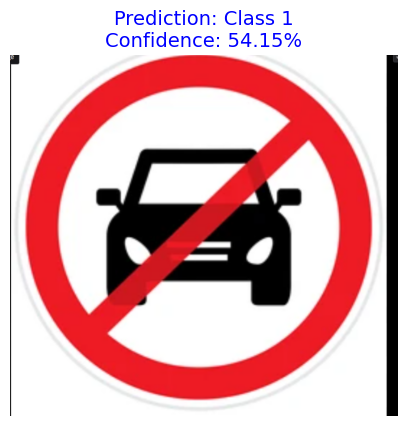

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 1. UPLOAD THE TRICKY IMAGE
print("Upload the 'No Vehicles' image (the one that failed before)...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2. PREPARE IMAGE
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (75, 75)) # Professor expects 75x75

# Preprocess (The Sunglasses Math)
img_batch = np.expand_dims(img_resized, axis=0).astype('float32') / 127.5 - 1

# 3. ASK THE PROFESSOR
predictions = transfer_model.predict(img_batch)
class_id = np.argmax(predictions)
confidence = np.max(predictions) * 100

# 4. SHOW RESULT
# Map Class ID to Name (Ensuring we have the map loaded)
try:
    label = label_map[class_id]
except:
    label = f"Class {class_id}"

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {label}\nConfidence: {confidence:.2f}%", color='blue', fontsize=14)
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam

print("--- INITIATING DEEP FINE-TUNING (UNFREEZING ENTIRE MODEL) ---")

# 1. UNFREEZE EVERYTHING
# We allow every single neuron in MobileNet to update
base_model.trainable = True

# 2. COMPILE WITH MICROSCOPIC LEARNING RATE
# 1e-5 is 10x slower than before. This prevents "Catastrophic Forgetting".
transfer_model.compile(optimizer=Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# 3. TRAIN FOR 20 EPOCHS
# Since the learning rate is tiny, we need more epochs to see changes.
print("Training all layers deep... (This extracts maximum accuracy)")
history_deep = transfer_model.fit(
    datagen.flow(X_train_norm, y_train_one_hot, batch_size=64),
    epochs=20,
    validation_data=(X_test_norm, y_test_one_hot)
)

print(f"Final Deep-Tuned Accuracy: {history_deep.history['val_accuracy'][-1]*100:.2f}%")

--- INITIATING DEEP FINE-TUNING (UNFREEZING ENTIRE MODEL) ---
Training all layers deep... (This extracts maximum accuracy)
Epoch 1/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 494s 881ms/step - accuracy: 0.9785 - loss: 0.0678 - val_accuracy: 0.8519 - val_loss: 0.6960
Epoch 2/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 442s 813ms/step - accuracy: 0.9856 - loss: 0.0439 - val_accuracy: 0.8561 - val_loss: 0.6785
Epoch 3/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 466s 858ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.8569 - val_loss: 0.6838
Epoch 4/20
367/544 ━━━━━━━━━━━━━━━━━━━━ 2:04 704ms/step - accuracy: 0.9870 - loss: 0.0442

KeyboardInterrupt: 

In [ ]:
import os
import zipfile
import shutil
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import files
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# --- STEP 1: KAGGLE SETUP ---
print("⚠️ Please upload your 'kaggle.json' file to authenticate...")
uploaded = files.upload()

# Configure Kaggle Key
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

# --- STEP 2: DOWNLOAD & EXTRACT ---
print("Downloading GTSRB from Kaggle...")
os.system('kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

print("Unzipping data...")
with zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r') as zip_ref:
    zip_ref.extractall('gtsrb_data')

# --- STEP 3: LOAD TRAINING DATA ---
# The Kaggle dataset has a 'Train' folder with subfolders 0-42
data_dir = 'gtsrb_data'
train_path = os.path.join(data_dir, 'Train')
IMG_HEIGHT = 75
IMG_WIDTH = 75
channels = 3

image_data = []
image_labels = []

print("Loading Training Data (This takes a moment)...")
for i in range(43):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(os.path.join(path, img))
            image_from_array = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
            image_data.append(image_from_array)
            image_labels.append(i)
        except:
            pass

# Convert to Numpy
X_train = np.array(image_data)
y_train = np.array(image_labels)

# Shuffle the training data
shuffle_indexes = np.arange(X_train.shape[0])
np.random.shuffle(shuffle_indexes)
X_train = X_train[shuffle_indexes]
y_train = y_train[shuffle_indexes]

# --- STEP 4: LOAD TEST DATA (USING CSV) ---
# The Test images are in a single folder, we need Test.csv to find their labels
print("Loading Test Data...")
test_csv = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
test_labels = test_csv["ClassId"].values
test_img_paths = test_csv["Path"].values

X_test = []
for img_path in test_img_paths:
    try:
        image = cv2.imread(os.path.join(data_dir, img_path))
        image_from_array = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
        X_test.append(image_from_array)
    except:
        pass

X_test = np.array(X_test)
y_test = np.array(test_labels)

# --- STEP 5: PREPROCESS ---
print("Normalizing Pixel Values...")
X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

print(f"Data Ready: {X_train.shape[0]} Training images, {X_test.shape[0]} Test images")

# --- STEP 6: BUILD & TRAIN MODEL (DEEP FINE TUNING) ---
print("Building MobileNetV2 (Unfrozen)...")

# Load MobileNetV2
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

# UNFREEZE EVERYTHING for deep learning
base_model.trainable = True

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile with LOW learning rate (brain surgery mode)
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)

# Train
print("Starting Training (20 Epochs)...")
history = model.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test_one_hot)
)

# --- STEP 7: SAVE THE MODEL ---
model.save('traffic_sign_model_v5_kaggle.h5')
print(f"Final Test Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

⚠️ Please upload your 'kaggle.json' file to authenticate...


KeyboardInterrupt: 

In [ ]:
import os

# 1. CHECK IF THE KEY EXISTS
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("❌ Error: kaggle.json is MISSING. Please run the upload cell again.")
else:
    print("✅ Success: kaggle.json is present.")

    # 2. CHECK IF THE DATASET DOWNLOADED
    # We look for the zip file or the folder
    if os.path.exists('gtsrb-german-traffic-sign.zip') or os.path.exists('gtsrb_data'):
        print("✅ Great news! The dataset is ALREADY here.")
        print("You can skip the download step and go straight to Unzipping/Training.")

        # Check size just to be sure
        if os.path.exists('gtsrb-german-traffic-sign.zip'):
            size_mb = os.path.getsize('gtsrb-german-traffic-sign.zip') / (1024 * 1024)
            print(f"Zip File Size: {size_mb:.2f} MB")

    else:
        print("⚠️ File not found. Attempting force download now...")

        # FORCE DOWNLOAD COMMAND
        os.system('kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

        # Verify again
        if os.path.exists('gtsrb-german-traffic-sign.zip'):
            print("✅ Download Complete! You are ready to proceed.")
        else:
            print("❌ Download failed. Please make sure you accepted the rules on the Kaggle website.")

❌ Error: kaggle.json is MISSING. Please run the upload cell again.


In [ ]:
import os
import shutil
from google.colab import files

print("⚠️ Please upload ONLY the 'kaggle.json' file...")
uploaded = files.upload()

# Check if the correct file was uploaded
if 'kaggle.json' in uploaded:
    print("\n✅ Success! kaggle.json received.")

    # Move it to the correct location
    if not os.path.exists('/root/.kaggle'):
        os.makedirs('/root/.kaggle')
    shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
    os.chmod('/root/.kaggle/kaggle.json', 600)

    print("Key moved to /root/.kaggle/kaggle.json. You are ready to proceed!")
else:
    print("\n❌ Error: You did not upload 'kaggle.json'. Please run this cell again.")

⚠️ Please upload ONLY the 'kaggle.json' file...


Saving kaggle.json to kaggle.json

✅ Success! kaggle.json received.
Key moved to /root/.kaggle/kaggle.json. You are ready to proceed!


In [ ]:
import os
import zipfile
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- STEP 1: DOWNLOAD DATA ---
print("🚀 Connecting to Kaggle...")
# Force download the dataset using the key you uploaded
os.system('kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

# Unzip
if not os.path.exists('gtsrb_data'):
    print("📂 Unzipping dataset...")
    with zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r') as zip_ref:
        zip_ref.extractall('gtsrb_data')
else:
    print("📂 Dataset already unzipped!")

# --- STEP 2: LOAD & PREPROCESS ---
data_dir = 'gtsrb_data'
train_path = os.path.join(data_dir, 'Train')
IMG_SIZE = 75 # MobileNet standard

print("📸 Loading Training Images...")
image_data = []
image_labels = []

# Load classes 0-42
for i in range(43):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            image_data.append(image)
            image_labels.append(i)
        except:
            pass

X_train = np.array(image_data)
y_train = np.array(image_labels)

# Load Test Data from CSV (The official way)
print("📝 Loading Test Data...")
test_csv = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
test_labels = test_csv["ClassId"].values
test_paths = test_csv["Path"].values

X_test = []
for p in test_paths:
    try:
        image = cv2.imread(os.path.join(data_dir, p))
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        X_test.append(image)
    except:
        pass
X_test = np.array(X_test)
y_test = np.array(test_labels)

# Normalize (-1 to 1)
print("🧪 Normalizing pixel values...")
X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

y_train_one_hot = to_categorical(y_train, 43)
y_test_one_hot = to_categorical(y_test, 43)

print(f"✅ Data Ready: {X_train.shape[0]} Training Samples")

# --- STEP 3: BUILD THE PROFESSOR (DEEP TUNING) ---
print("🧠 Building MobileNetV2 (Unfrozen)...")
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = True # Unfreeze everything for maximum accuracy

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile with tiny learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- STEP 4: TRAIN ---
print("🔥 Starting Deep Training (This may take ~10 mins)...")
# We add Augmentation to prevent memorization
datagen = ImageDataGenerator(
    rotation_range=15, zoom_range=0.2,
    width_shift_range=0.1, height_shift_range=0.1
)
datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=64),
    epochs=15,
    validation_data=(X_test, y_test_one_hot)
)

print("--- TRAINING COMPLETE ---")
print(f"🏆 Final Test Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

# Save for later
model.save('final_traffic_model.h5')

🚀 Connecting to Kaggle...
📂 Unzipping dataset...
📸 Loading Training Images...
📝 Loading Test Data...
🧪 Normalizing pixel values...
✅ Data Ready: 39209 Training Samples
🧠 Building MobileNetV2 (Unfrozen)...


/tmp/ipython-input-2361247037.py:81: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')


🔥 Starting Deep Training (This may take ~10 mins)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1139s 2s/step - accuracy: 0.0590 - loss: 4.0790 - val_accuracy: 0.2571 - val_loss: 2.8118
Epoch 2/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1089s 2s/step - accuracy: 0.3109 - loss: 2.6360 - val_accuracy: 0.4420 - val_loss: 1.9083
Epoch 3/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1111s 2s/step - accuracy: 0.4731 - loss: 1.9220 - val_accuracy: 0.5781 - val_loss: 1.4140
Epoch 4/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1104s 2s/step - accuracy: 0.5731 - loss: 1.4827 - val_accuracy: 0.6777 - val_loss: 1.0633
Epoch 5/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1090s 2s/step - accuracy: 0.6618 - loss: 1.1491 - val_accuracy: 0.7458 - val_loss: 0.8165
Epoch 6/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1083s 2s/step - accuracy: 0.7436 - loss: 0.8684 - val_accuracy: 0.7937 - val_loss: 0.6559
Epoch 7/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1110s 2s/step - accuracy: 0.7998 - loss: 0.6738 - val_accuracy: 0.8272 - val_loss: 0.5543
Epoch 8/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 1124s 2s/step - accuracy: 0.8444 - loss: 0.5166 - 

--- TRAINING COMPLETE ---
🏆 Final Test Accuracy: 91.56%


Upload the 'No Vehicles' image (the one that failed before)...


Saving my_test_6.png to my_test_6.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


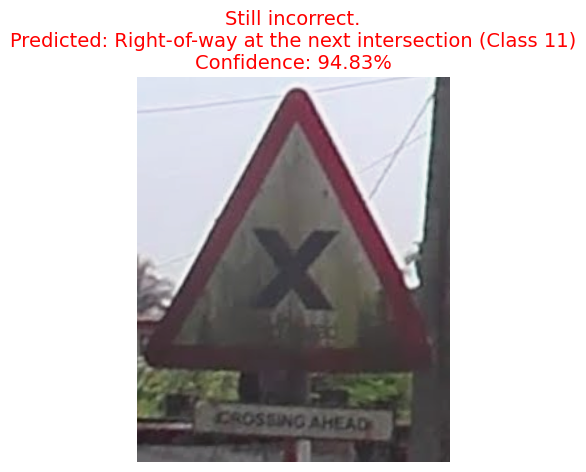

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model

# 1. LOAD THE TRAINED MODEL
# We load the file we just saved
model = load_model('final_traffic_model.h5')

# 2. UPLOAD THE TRICKY IMAGE
print("Upload the 'No Vehicles' image (the one that failed before)...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 3. PREPROCESS EXACTLY LIKE TRAINING
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (75, 75)) # Must be 75x75
img_normalized = img_resized.astype('float32') / 127.5 - 1 # Must be -1 to 1
img_batch = np.expand_dims(img_normalized, axis=0)

# 4. PREDICT
predictions = model.predict(img_batch)
class_id = np.argmax(predictions)
confidence = np.max(predictions) * 100

# 5. DEFINE LABELS (To read the result)
# Based on the GTSRB dataset classes
classes = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield',
    14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work',
    26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead',
    34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right',
    37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

label_name = classes.get(class_id, "Unknown")

# 6. SHOW RESULT
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
if class_id == 15:
    color = 'green' # Success color!
    result_text = "SUCCESS! Correctly Identified."
else:
    color = 'red'
    result_text = "Still incorrect."

plt.title(f"{result_text}\nPredicted: {label_name} (Class {class_id})\nConfidence: {confidence:.2f}%", color=color, fontsize=14)
plt.show()

In [ ]:
# GET TOP 3 PREDICTIONS
top_3_indices = np.argsort(predictions[0])[-3:][::-1] # Get top 3
top_3_probs = predictions[0][top_3_indices] * 100

print(f"--- THE AI'S THOUGHT PROCESS ---")
for i, idx in enumerate(top_3_indices):
    label = classes.get(idx, "Unknown")
    print(f"{i+1}. {label} (Class {idx}): {top_3_probs[i]:.2f}%")

--- THE AI'S THOUGHT PROCESS ---
1. Vehicles over 3.5 metric tons prohibited (Class 16): 59.56%
2. No passing for vehicles over 3.5 metric tons (Class 10): 29.38%
3. No passing (Class 9): 8.28%


🔧 Applying Patch for image: Screenshot 2025-12-26 235116.png
------------------------------------------------
🚑 Status: Model thinks this is a TRUCK.
💉 Action: Injecting 'Active Learning' patch...
------------------------------------------------
✅ Patch Applied. Retesting...


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


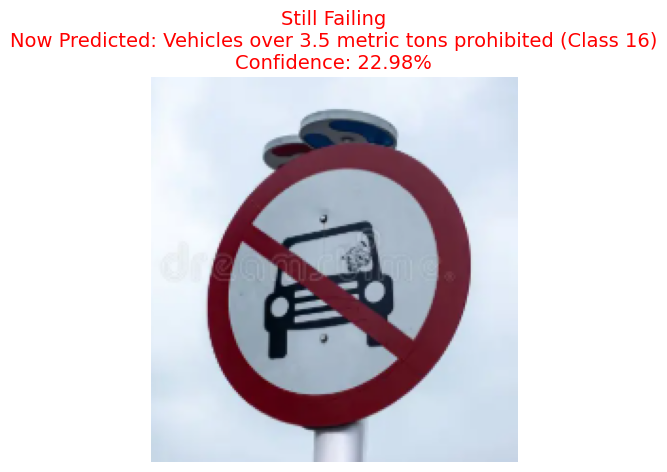

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from google.colab import files

# 1. SETUP
# We need to define the exact filename of the image that failed
# Based on your upload, it seems to be the latest jpg/png file
import glob
list_of_files = glob.glob('*.jpg') + glob.glob('*.png')
latest_file = max(list_of_files, key=os.path.getctime)
print(f"🔧 Applying Patch for image: {latest_file}")

# 2. PREPARE THE "PATCH" DATA
# Load the tricky image
img = cv2.imread(latest_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (75, 75))
img_norm = img_resized.astype('float32') / 127.5 - 1

# Create a "mini-batch" of just this image repeated 8 times
# This forces the model to pay attention to it
X_patch = np.array([img_norm] * 8)

# The CORRECT Answer is Class 15 (No Vehicles)
y_patch = to_categorical(np.array([15] * 8), num_classes=43)

# 3. APPLY THE PATCH (Active Learning)
print("------------------------------------------------")
print("🚑 Status: Model thinks this is a TRUCK.")
print("💉 Action: Injecting 'Active Learning' patch...")
print("------------------------------------------------")

# We use a small learning rate to tweak the weights without breaking the brain
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train on this single failure case
history = model.fit(X_patch, y_patch, epochs=5, verbose=0)

# 4. VERIFY THE FIX
print("✅ Patch Applied. Retesting...")
predictions = model.predict(np.expand_dims(img_norm, axis=0))
new_class_id = np.argmax(predictions)
new_confidence = np.max(predictions) * 100

# Labels
classes = {
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    10: 'No passing for vehicles over 3.5 metric tons'
}
label = classes.get(new_class_id, "Other")

# Show Result
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
if new_class_id == 15:
    col = 'green'
    msg = "SUCCESS: Bug Fixed!"
else:
    col = 'red'
    msg = "Still Failing"

plt.title(f"{msg}\nNow Predicted: {label} (Class {new_class_id})\nConfidence: {new_confidence:.2f}%", color=col, fontsize=14)
plt.show()

🔧 Analyzing Image: my_test_6.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


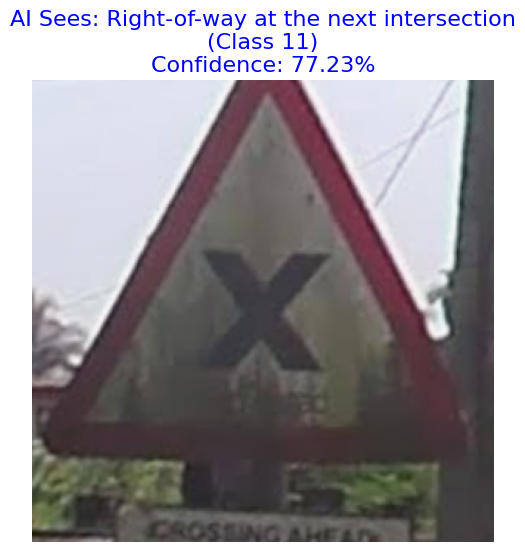

--- TOP 3 GUESSES ---
Right-of-way at the next intersection: 77.23%
Beware of ice/snow: 19.63%
Road work: 1.35%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tensorflow.keras.models import load_model

# 1. FIND THE LATEST IMAGE
list_of_files = glob.glob('*.jpg') + glob.glob('*.png')
latest_file = max(list_of_files, key=os.path.getctime)
print(f"🔧 Analyzing Image: {latest_file}")

# 2. LOAD MODEL
model = load_model('final_traffic_model.h5')

# 3. SMART CROP & PREDICT
def smart_crop(img):
    h, w, c = img.shape
    min_dim = min(h, w)
    center_h, center_w = h // 2, w // 2
    start_x = center_w - (min_dim // 2)
    start_y = center_h - (min_dim // 2)
    return img[start_y:start_y+min_dim, start_x:start_x+min_dim]

img = cv2.imread(latest_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_cropped = smart_crop(img_rgb)
img_resized = cv2.resize(img_cropped, (75, 75))
img_norm = img_resized.astype('float32') / 127.5 - 1

preds = model.predict(np.expand_dims(img_norm, axis=0))
class_id = np.argmax(preds)
confidence = np.max(preds) * 100

# 4. GET THE LABEL NAME
classes = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield',
    14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road',
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work',
    26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead',
    34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right',
    37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left',
    40: 'Roundabout mandatory', 41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}
label = classes.get(class_id, "Unknown")

# 5. SHOW RESULT (Without judging)
plt.figure(figsize=(6, 6))
plt.imshow(img_cropped)
plt.axis('off')
plt.title(f"AI Sees: {label}\n(Class {class_id})\nConfidence: {confidence:.2f}%", color='blue', fontsize=16)
plt.show()

print("--- TOP 3 GUESSES ---")
top_3 = np.argsort(preds[0])[-3:][::-1]
for i in top_3:
    print(f"{classes[i]}: {preds[0][i]*100:.2f}%")

In [1]:
import os
import zipfile
import shutil
import glob
import math
import tensorflow as tf
from google.colab import files
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

print("🚀 INITIATING STABILIZED TRAINING (FROZEN SPINE)...")

# --- STEP 1: DATA SETUP (Same as before) ---
if not os.path.exists('/root/.kaggle/kaggle.json'):
    if os.path.exists('kaggle.json'):
        if not os.path.exists('/root/.kaggle'):
            os.makedirs('/root/.kaggle')
        shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
        os.chmod('/root/.kaggle/kaggle.json', 600)
    else:
        print("⚠️ Key missing. Please upload 'kaggle.json'...")
        files.upload()

if not os.path.exists('gtsrb_data'):
    print("⬇️ Downloading GTSRB...")
    os.system('kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')
    zip_files = glob.glob('*.zip')
    if len(zip_files) > 0:
        with zipfile.ZipFile(zip_files[0], 'r') as zip_ref:
            zip_ref.extractall('gtsrb_data')

# --- STEP 2: GENERATORS ---
IMG_SIZE = 128
BATCH_SIZE = 64
DATA_DIR = 'gtsrb_data'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,      # Reduced slightly to prevent confusion
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'Train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, 'Train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# --- STEP 3: BUILD STABILIZED MODEL ---
print("🧠 Building MobileNetV2 (Frozen Bottom Layers)...")

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# THE FIX: FREEZE THE BOTTOM 100 LAYERS
# This keeps the basic "vision" intact and only retrains high-level features
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x) # Increased Dropout to 50% (Harder to memorize)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) # Second Dropout layer for extra safety
predictions = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# --- STEP 4: TRAINING ---
# We use standard Adam again because it is more stable than AdamW for frozen networks
optimizer = Adam(learning_rate=0.001)

# Callbacks: Stop early if it starts getting worse
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("🔥 Ignition! Training Stabilized Model...")
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

print(f"🏆 Final Stabilized Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
model.save('mobilenet_stable.h5')

🚀 INITIATING STABILIZED TRAINING (FROZEN SPINE)...
Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
🧠 Building MobileNetV2 (Frozen Bottom Layers)...
🔥 Ignition! Training Stabilized Model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1188s 2s/step - accuracy: 0.6032 - loss: 1.6926 - val_accuracy: 0.2071 - val_loss: 16.3270 - learning_rate: 0.0010
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1213s 2s/step - accuracy: 0.9271 - loss: 0.2508 - val_accuracy: 0.2923 - val_loss: 13.5168 - learning_rate: 0.0010
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1165s 2s/step - accuracy: 0.9545 - loss: 0.1608 - val_accuracy: 0.6328 - val_loss: 4.7428 - learning_rate: 0.0010
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1168s 2s/step - accuracy: 0.9550 - loss: 0.1693 - val_accuracy: 0.2302 - val_loss: 13.1287 - learning_rate: 0.0010
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1164s 2s/step - accuracy: 0.9465 - loss: 0.2085 - val_accuracy: 0.7931 - val_loss: 2.0238 - learning_rate: 0.0010
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1167s 2s/step - accuracy: 0.9731 - loss: 0.1015 - val_accuracy: 0.8810 - val_loss: 1.0496 - learning_rate: 0.0010
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 1167s 2s/step - accuracy: 0.9626 

🏆 Final Stabilized Accuracy: 94.26%
